In [12]:
import os
import string
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf

data_dir = Path('../data')

income_groups_1637 = pd.read_csv(data_dir / 'interim' / 'income_groups_1637.csv', index_col='district')
income_1880 = pd.read_csv(data_dir / 'interim' / 'income_tax_record_1880.csv', index_col=0)
income_1880['total_tax'] = income_1880.sum(axis=1)

C:\Users\antth\AppData\Local\Temp\ipykernel_15764\537570600.py:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [13]:
totals = income_groups_1637.sum(axis=0)
percentiles = (totals / totals.sum()).round(2)
cum_percentiles = percentiles.cumsum()
cum_percentiles

12_ore    0.67
16_ore    1.00
dtype: float64

In [14]:
breaks = income_1880.total_tax.quantile(cum_percentiles)
breaks

0.67      2.0
1.00    562.0
Name: total_tax, dtype: float64

In [15]:
classes = pd.cut(
    income_1880.total_tax,
    bins=[0] + list(breaks),
    labels=[1, 2],
)
income_1880['class'] = classes
income_1880.loc[0:518, 'district'] = 'Vanha_kaupunki'
income_1880.loc[675:708, 'district'] = 'Vallin_laajennus'
income_1880

,district,plot_number,estate_income,business_income,salary_pension_income,total_tax,class
0,Vanha_kaupunki,1,0.0,0.0,3.0,3.0,2
1,Vanha_kaupunki,2,15.0,0.0,25.0,40.0,2
2,Vanha_kaupunki,2,0.0,0.0,1.0,1.0,1
3,Vanha_kaupunki,2,0.0,0.0,1.0,1.0,1
4,Vanha_kaupunki,2,0.0,0.0,40.0,40.0,2
...,...,...,...,...,...,...,...
3331,Sorvalinsaari,18,0.0,0.0,1.0,1.0,1
3332,Sorvalinsaari,18,0.0,0.0,1.0,1.0,1
3333,Sorvalinsaari,19,0.0,0.0,1.0,1.0,1
3334,Sorvalinsaari,19,0.0,0.0,1.0,1.0,1


In [16]:
cross = income_1880[["district", "class", "plot_number"]].groupby(["district", "class"]).count()
cross.rename(columns={'plot_number': 'count'}, inplace=True)
cross.to_csv(data_dir / 'processed' / 'classes_by_district_1880.csv')
cross

count
district             class       
Anina                1        175
                     2         12
Havi                 1         25
                     2          3
Hiekka               1         65
                     2         21
Huusniemi            1          1
                     2          0
Likolampi            1         32
                     2          4
Monrepos             1          5
                     2          0
P_Annan_kruunu       1         17
                     2         11
Pantsarlahti         1        379
                     2         34
Papula               1         43
                     2         22
Paulovski            1        163
                     2          3
Pietarin_esikaupunki 1        668
                     2        236
Pikiruukki           1         33
                     2          5
Repola               1         32
                     2         47
Salakkalahti         1         38
                     2         74
Saunalahti           1         31
                     2         15
Sorvalinsaari        1         87
                     2          3
Talikkala            1         14
                     2          1
Valli                1        133
                     2         74
Vallin_laajennus     1         21
                     2         13
Vanha_kaupunki       1        257
                     2        262
Viipurin_esikaupunki 1        175
                     2        101

In [17]:
import cufflinks as cf

new_districts = 'Salakkalahti Repola Anina Pantsarlahti Papula Vallin_laajennus Saunalahti'.split(' ')
old_suburbs = 'Pietarin_esikaupunki Viipurin_esikaupunki'.split(' ')
outside_town = 'Sorvalinsaari Talikkala Monrepos Havi Huusniemi Likolampi Hiekka Pikiruukki'.split(' ')

cross = cross.reset_index()
cross = cross.pivot(index='district', columns='class', values='count')
# cross = cross[['2', '1']]
cross.sum(axis=1)

district
Anina                   187
Havi                     28
Hiekka                   86
Huusniemi                 1
Likolampi                36
Monrepos                  5
P_Annan_kruunu           28
Pantsarlahti            413
Papula                   65
Paulovski               166
Pietarin_esikaupunki    904
Pikiruukki               38
Repola                   79
Salakkalahti            112
Saunalahti               46
Sorvalinsaari            90
Talikkala                15
Valli                   207
Vallin_laajennus         34
Vanha_kaupunki          519
Viipurin_esikaupunki    276
dtype: int64

In [18]:
income_groups_1639_pct = income_groups_1637.copy()
income_groups_1639_pct['12_ore'] = income_groups_1637['12_ore'] / income_groups_1637.sum(axis=1)
income_groups_1639_pct['16_ore'] = income_groups_1637['16_ore'] / income_groups_1637.sum(axis=1)
income_groups_1639_pct

,12_ore,16_ore
district,,
Kaupunki,0.260504,0.739496
Valli,0.838323,0.161677
Siikaniemi,0.902655,0.097345
Pantsarlahti,0.911111,0.088889
tenant_farmers,1.000000,0.000000


In [19]:
cross_pct = cross.copy()
cross_pct[2] = cross[2] / cross.sum(axis=1)
cross_pct[1] = cross[1] / cross.sum(axis=1)
cross_pct

class,1,2
district,,
Anina,0.935829,0.064171
Havi,0.892857,0.107143
Hiekka,0.755814,0.244186
Huusniemi,1.000000,0.000000
Likolampi,0.888889,0.111111
Monrepos,1.000000,0.000000
P_Annan_kruunu,0.607143,0.392857
Pantsarlahti,0.917676,0.082324
Papula,0.661538,0.338462


<AxesSubplot:ylabel='district'>

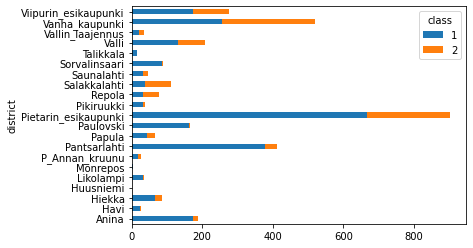

In [20]:
cross.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

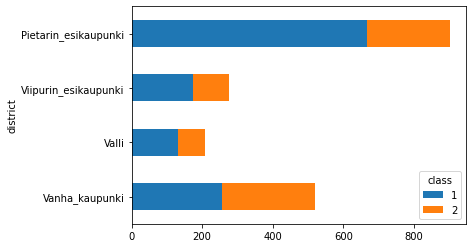

In [21]:
cross.loc['Vanha_kaupunki Valli Viipurin_esikaupunki Pietarin_esikaupunki'.split(' ')].plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

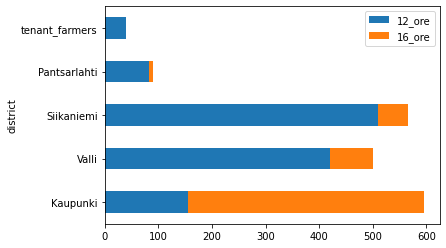

In [22]:
income_groups_1637.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

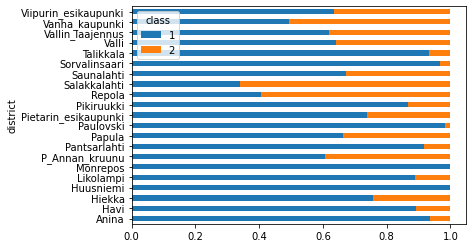

In [23]:
cross_pct.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

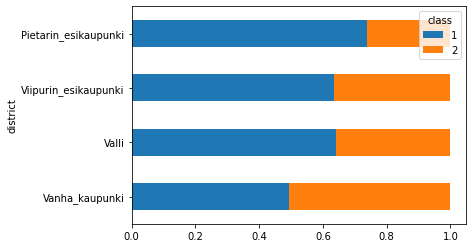

In [24]:
cross_pct.loc['Vanha_kaupunki Valli Viipurin_esikaupunki Pietarin_esikaupunki'.split(' ')].plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

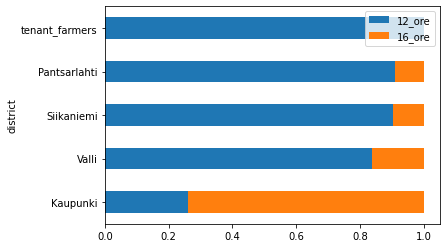

In [25]:
income_groups_1639_pct.plot(kind='barh', stacked=True)